# PIMA diabetes looking into different sampling options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from jmspack.utils import (apply_scaling,
                          JmsColors)
from imblearn.over_sampling import (SMOTE, 
                                    ADASYN, 
                                    BorderlineSMOTE, 
                                    SVMSMOTE,
                                    KMeansSMOTE
                                   )

In [2]:
if "jms_style_sheet" in plt.style.available:
    plt.style.use("jms_style_sheet")

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
target = "Outcome"

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Mask 0 default values (seen in EDA)

In [7]:
df = (df.drop([target, "Pregnancies"], axis=1)
       .replace(0, np.nan)
       .merge(df[[target, "Pregnancies"]], left_index=True, right_index=True)
      .dropna()
     )

## Plot the amount of rows in each side of the target

#### Looks like the target is imbalanced so this needs to be taken into account

Amount in each outcome


0    262
1    130
Name: Outcome, dtype: int64

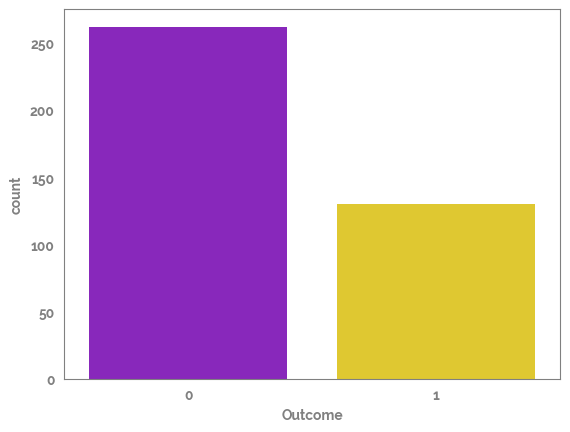

In [8]:
_ = sns.countplot(x=df[target])
print("Amount in each outcome")
df[target].value_counts()

#### There are two main ways to take this imbalance into account, either by (re)-sampling the data to make the outcome amount equal, or by using a classifier which takes the imbalance into account in the model (usually known as a bagging classifier)

In [9]:
feature_list = ["Glucose", "BMI"]

In [10]:
sampling_options_dict = {"SMOTE": SMOTE(sampling_strategy="not majority",
                                        random_state=42, 
                                        n_jobs=2),
                         "BorderlineSMOTE": BorderlineSMOTE(sampling_strategy="not majority",
                                        random_state=42, 
                                        n_jobs=2),
                         "SVMSMOTE": SVMSMOTE(sampling_strategy="not majority",
                                        random_state=42, 
                                        n_jobs=2),
                         "KMeansSMOTE": KMeansSMOTE(sampling_strategy="not majority",
                                        random_state=42, 
                                        n_jobs=2),
                         "ADASYN": ADASYN(sampling_strategy="not majority",
                                        random_state=42, 
                                        n_jobs=2),
                        }

SMOTE
(392, 8) (392,) (524, 8) (524,)


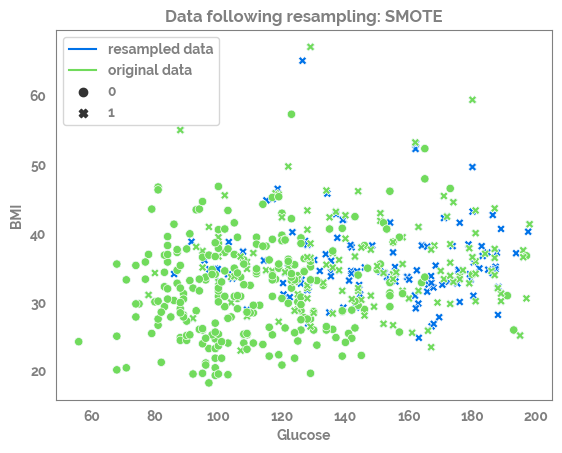

BorderlineSMOTE
(392, 8) (392,) (524, 8) (524,)


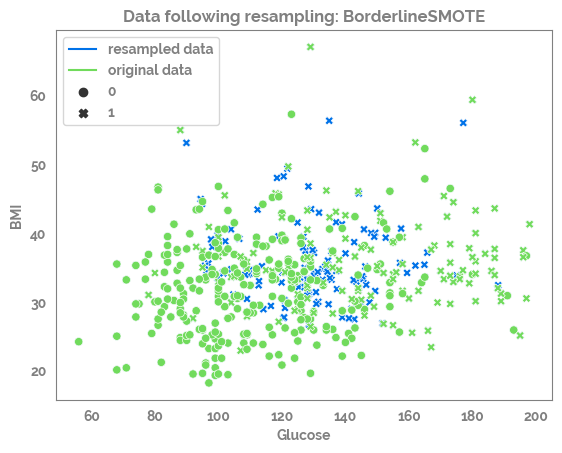

SVMSMOTE
(392, 8) (392,) (524, 8) (524,)


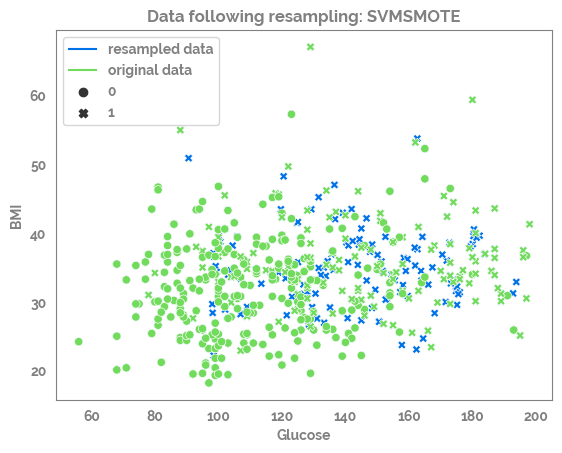

KMeansSMOTE
(392, 8) (392,) (525, 8) (525,)


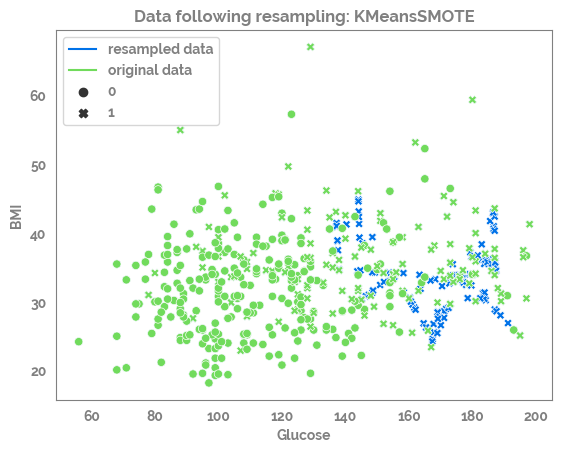

ADASYN
(392, 8) (392,) (525, 8) (525,)


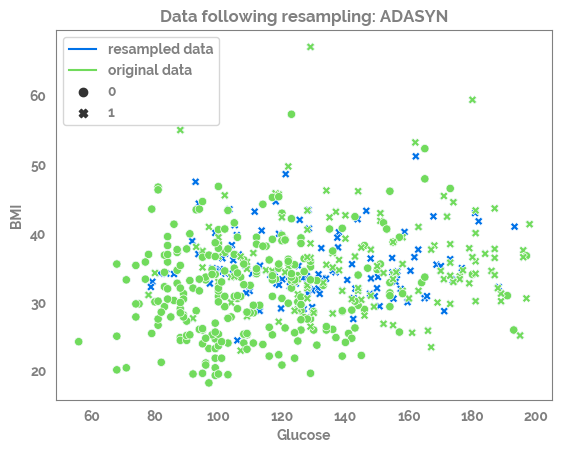

In [18]:
X = df.drop(target, axis=1)
y = df[target]

for samp_opt in sampling_options_dict:
    print(samp_opt)
    
    sm = sampling_options_dict[samp_opt]
    X_res, y_res = sm.fit_resample(X, y)
    print(X.shape, y.shape, X_res.shape, y_res.shape)

    df_res = pd.concat([X_res, y_res], axis=1)

    _ = sns.scatterplot(data=df_res,
                       x=feature_list[0],
                       y=feature_list[1],
                       color=JmsColors.DARKBLUE,
                       style=target)
    _ = sns.scatterplot(data=df,
                       x=feature_list[0],
                       y=feature_list[1],
                       color=JmsColors.GREENYELLOW,
                       style=target,
                       legend=False)
    _ = plt.plot(df_res[feature_list[0]].min(), 
                    df_res[feature_list[1]].min(), 
                    c=JmsColors.DARKBLUE, 
                    label = "resampled data")
    _ = plt.plot(df_res[feature_list[0]].min(), 
                    df_res[feature_list[1]].min(), 
                    c=JmsColors.GREENYELLOW, 
                    label = "original data")
    _ = plt.legend()
    _ = plt.title(f"Data following resampling: {samp_opt}")
    _ = plt.show()